In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

In [55]:
CombModels_BSC_prediction = '/work/shared/ptbc/CNN_Pancreas_V2/Donnees/project_kernel03_scan21000500/Results/SCNN/CombModels_BSC_prediction/'

In [56]:
slides = os.listdir(CombModels_BSC_prediction)

In [57]:
pd.read_csv(f'{CombModels_BSC_prediction}{slides[0]}').head(2)

,tuile,classPath
0,21_0_005_00_87_1,classe1
1,21_0_005_00_87_2,classe1


In [58]:
for i in range(len(slides)):
    df = pd.read_csv(f'{CombModels_BSC_prediction}{slides[i]}')
    counts = df['classPath'].value_counts(normalize=False)
    print(f'for {slides[i]} slide : \n {counts}')
        

for 21_0_005_00_87.csv slide : 
 classe5    4875
classe1    2525
classe6     632
classe2     573
Name: classPath, dtype: int64
for 21_0_005_00_113.csv slide : 
 classe1    11735
classe5     4362
classe2     1022
classe6      994
Name: classPath, dtype: int64
for 21_0_005_00_56.csv slide : 
 classe5    8636
classe1    7323
classe6    1155
classe2     947
Name: classPath, dtype: int64
for 21_0_005_00_42.csv slide : 
 classe1    17025
classe5     1412
classe2      462
classe6      311
Name: classPath, dtype: int64
for 21_0_005_00_38.csv slide : 
 classe5    9877
classe1    2114
classe6     265
classe2     192
Name: classPath, dtype: int64
for 21_0_005_00_29.csv slide : 
 classe1    6831
classe5    3691
classe2    1319
classe6    1240
Name: classPath, dtype: int64
for 21_0_005_00_28.csv slide : 
 classe1    18739
classe5     4841
classe2     1100
classe6     1041
Name: classPath, dtype: int64
for 21_0_005_00_52.csv slide : 
 classe1    6714
classe5    1380
classe2     461
classe6     442
N

In [59]:
myData = pd.DataFrame(columns=['c1','c2','c3','c4','c5','c6'], index=[slides], data = None)
myData.head(2)

,c1,c2,c3,c4,c5,c6
21_0_005_00_87.csv,NaN,NaN,NaN,NaN,NaN,NaN
21_0_005_00_113.csv,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
c1, c2, c3, c4, c5, c6 = [0 for i in range(6)]
for i in range(len(slides)):
    df = pd.read_csv(f'{CombModels_BSC_prediction}{slides[i]}')
    
    for tile in df['classPath']:
        if tile == 'classe1':
            c1 = c1+1
            myData.loc[slides[i], 'c1'] = c1
        elif tile == 'classe2':
            c2 = c2+1
            myData.loc[slides[i], 'c2'] = c2
        elif tile == 'classe3':
            c3 = c3+1
            myData.loc[slides[i], 'c3'] = c3
        elif tile == 'classe4':
            c4 = c4+1
            myData.loc[slides[i], 'c4'] = c4
        elif tile == 'classe5':
            c5 = c5+1
            myData.loc[slides[i], 'c5'] = c5
        elif tile == 'classe6':
            c6 = c6+1
            myData.loc[slides[i], 'c6'] = c6

In [61]:
myData1=shuffle(myData.reset_index().rename(columns={'level_0':'Tile'}))
myData1.head()

,Tile,c1,c2,c3,c4,c5,c6
6,21_0_005_00_28.csv,66292,5615,NaN,NaN,37694,5638
12,21_0_005_00_45.csv,110414,12641,NaN,NaN,68609,13139
15,21_0_005_00_111.csv,147691,15566,NaN,NaN,77356,15782
20,21_0_005_00_54.csv,179634,21391,NaN,NaN,112419,22279
18,21_0_005_00_58.csv,166145,18947,NaN,NaN,100329,19600


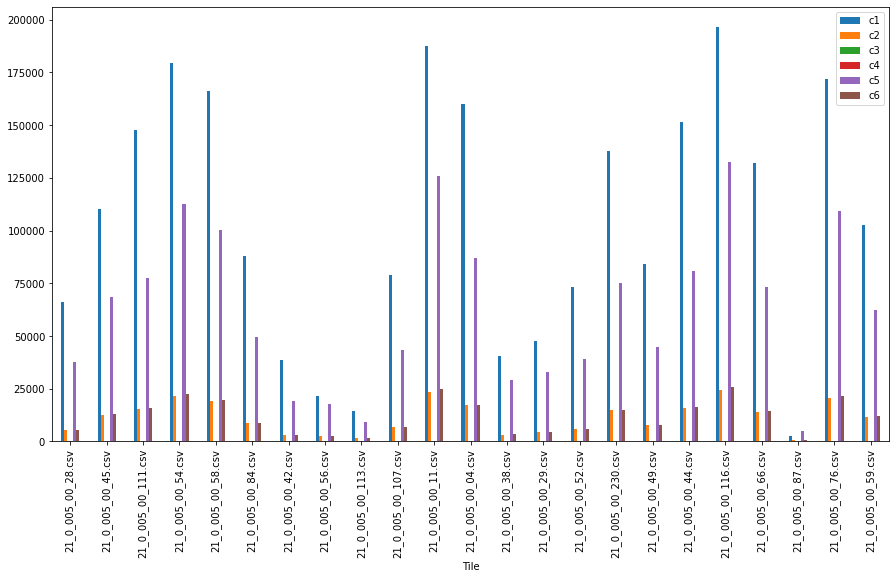

In [62]:

myData1.plot(x="Tile", y=['c1','c2','c3','c4','c5','c6'], kind="bar",figsize=(15,8))
plt.show()